In [234]:
import pandas as pd
import numpy as np
import cv2
from tensorflow import keras
from scipy.io import loadmat
from datetime import datetime, date, time

import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds

import time
# from natsort import os_sorted


%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
# !pip install natsort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dir=""

In [ ]:
# !ls "/content/drive/MyDrive/Luque_Londero"

In [5]:
db=loadmat(dir+"cars_annos.mat")

In [6]:
pqr=pd.Series(db)


In [7]:
pqr

__header__     b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Crea...
__version__                                                  1.0
__globals__                                                   []
annotations    [[[['car_ims/000001.jpg'], [[112]], [[7]], [[8...
class_names    [[[AM General Hummer SUV 2000], [Acura RL Seda...
dtype: object

In [8]:
pqr['annotations']

array([[(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        ...,
        (array(['car_ims/016183.jpg'], dtype='<U18'), array([[25]], dtype=uint8), array([[32]], dtype=uint8), array([[587]], dtype=uint16), array([[359]], dtype=uint16), array([[196]], dtype=uint8), array([[1]], dtype=uint8)),
        (array(['car_ims/016184.jpg'], dtype='<U18'), array([[56]], dtype=uint8), array([

In [9]:
train=0
test=0

for i in pqr['annotations'][0]:
  if [0] == i[-1]:
    train=train+1
  else:
    test=test+1

print("Train: %d" % train)
print("Test: %d" % test)

Train: 8144
Test: 8041


In [10]:
train_classes={}

for i in pqr['annotations'][0]:
  if i[-2][0][0] not in train_classes:
    train_classes[i[-2][0][0]]=1
  else:
    train_classes[i[-2][0][0]]=train_classes[i[-2][0][0]]+1
 




In [11]:
classes=pd.Series(train_classes)

In [12]:
classes

 1     89
 2     64
 3     86
 4     84
 5     81
       ..
-64    85
-63    83
-62    91
-61    86
-60    80
Length: 196, dtype: int64

In [16]:
print("Menores Datos: %d , de la clase %d" % (classes.min(),classes.idxmin()))

Menores Datos: 48 , de la clase -120


In [17]:
print("Mayores Datos: %d , de la clase %d" % (classes.max(),classes.idxmax()))

Mayores Datos: 136 , de la clase 119


In [15]:
print("Datos promedio por clase: %d" % classes.mean())

Datos promedio por clase: 82


In [14]:
classes.describe()

count    196.000000
mean      82.576531
std        8.690063
min       48.000000
25%       78.750000
50%       84.000000
75%       88.000000
max      136.000000
dtype: float64

In [ ]:
pqr

__header__     b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Crea...
__version__                                                  1.0
__globals__                                                   []
annotations    [[[['car_ims/000001.jpg'], [[112]], [[7]], [[8...
class_names    [[[AM General Hummer SUV 2000], [Acura RL Seda...
dtype: object

In [372]:
labels_names=pd.DataFrame(pqr['class_names'])
labels_names=labels_names.apply(lambda x: x[0])

In [373]:
labels_names.loc(1)[0][0]

'AM General Hummer SUV 2000'

In [374]:
labels_names_indexes = labels_names.columns[labels_names.iloc[labels_names.last_valid_index()].apply(lambda col: col.replace('/','_').lower()).argsort()]

In [375]:
labels_names_sorted=labels_names[labels_names_indexes]

In [22]:
x = np.array(pqr['class_names'])
f = lambda x: x[0]
f_v = np.vectorize(f)
labels_names_sorted = f_v(x)

In [ ]:
# labels_names_sorted=os_sorted(labels_names_sorted[0])

In [376]:
labels_names_sorted=pd.DataFrame(labels_names_sorted)

In [377]:
labels_names_sorted=labels_names_sorted.sort_values(by=0)

In [378]:
labels_names_sorted=labels_names_sorted.transpose()

In [ ]:
# !print(dir+"/car_ims/000001.jpg")

In [ ]:
# dir+"/"+"car_ims/000001.jpg"

In [ ]:
# !ls /content/drive/MyDrive/Luque_Londero/cars_ims/000001.jpg

In [ ]:
# def sample_images_data(x_data, y_data):
#     sample_images = []
#     sample_labels = []

#     for k in range(len(pqr['class_names'][0])):
#         samples=[]
#         for i in range(len(y_data)):
#           if(y_data[i][-2][0][0]==k) and (y_data[i][-1][0]==0):
#             samples.append(y_data[i])
#         samples = samples[:4]
#         for s in samples:
#             img = s[0][0]
#             print(img)
#             sample_images.append(cv2.imread(dir+"/"+img,0))
#             sample_labels.append(pqr['class_names'][0][s[-2][0][0]][0])

#     print("Total number of sample images to plot: ", len(sample_images))
#     return sample_images, sample_labels

# train_sample_images, train_sample_labels = sample_images_data(pqr['annotations'][0], pqr['annotations'][0])


In [ ]:
# def sample_images_data_test(x_data, y_data):
#     sample_images = []
#     sample_labels = []

#     for k in range(len(pqr['class_names'][0])):
#         samples=[]
#         for i in range(len(y_data)):
#           if(y_data[i][-2][0][0]==k) and (y_data[i][-1][0]==1):
#             samples.append(y_data[i])
#         samples = samples[:4]
#         for s in samples:
#             img = s[0][0]
#             print(img)
#             sample_images.append(cv2.imread(dir+"/"+img,0))
#             sample_labels.append(pqr['class_names'][0][s[-2][0][0]][0])

#     print("Total number of sample images to plot: ", len(sample_images))
#     return sample_images, sample_labels

# test_sample_images, test_sample_labels = sample_images_data_test(pqr['annotations'][0], pqr['annotations'][0])


In [ ]:
# pd.DataFrame(pqr['class_names'])

In [ ]:
# def data_preprocessing(x_data, y_data):
#     out_y = to_categorical(y_data, len(np.unique(y_data)))
#     num_images = x_data.shape[0]
#     x_shaped_array = np.expand_dims(x_data, axis=-1)
#     out_x = x_shaped_array / 255.
    
#     return out_x, out_y


In [ ]:
# pd.DataFrame(pqr['annotations'][0])

In [26]:
data_pandas=pd.DataFrame(pqr['annotations'][0])

In [ ]:
# data_pandas.describe()

In [ ]:
# traindata,testdata=[x for _,x in data_pandas.groupby(data_pandas['test'] ==1)]

In [ ]:

# print("Train Size: %d , Test Size: %d" % (len(traindata),len(testdata)) )

In [ ]:
# traindata=traindata.drop(columns=['test'])
# testdata=testdata.drop(columns=['test'])

In [ ]:
# traindata.head()

In [ ]:
# y_train_data=traindata.loc[:,'class']
# x_train_data=traindata.drop(columns=['class'])
# y_test_data=testdata.loc[:,'class']
# x_test_data=testdata.drop(columns=['class'])

In [ ]:
# pqr['class_names'][0]

In [ ]:
# plt.imshow(cv2.imread(dir+"/car_ims/000001.jpg"))

In [27]:
image_train_pre_augment=keras.utils.image_dataset_from_directory(
    dir+'car_ims_pre_augmentation/car_ims/train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 13238 files belonging to 196 classes.
Using 10591 files for training.


In [28]:
image_test_pre_augment=tf.keras.preprocessing.image_dataset_from_directory(
    dir+'car_ims_pre_augmentation/car_ims/train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 13238 files belonging to 196 classes.
Using 2647 files for validation.


In [30]:
image_train=keras.utils.image_dataset_from_directory(
    dir+'car_ims/train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 13240 files belonging to 196 classes.
Using 10592 files for training.


In [31]:
image_test=tf.keras.preprocessing.image_dataset_from_directory(
    dir+'car_ims/train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 13240 files belonging to 196 classes.
Using 2648 files for validation.


Reviso algunas imagenes con sus etiquetas

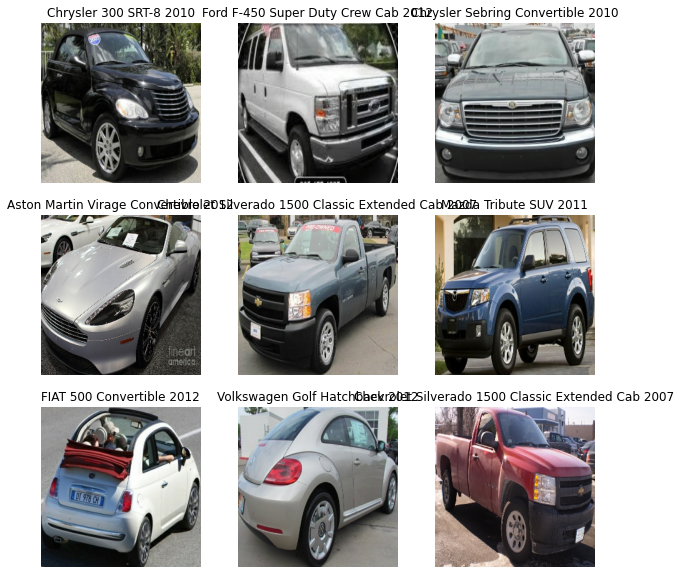

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in image_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels_names_sorted.iloc[np.argmax(labels[i]),0])
        plt.axis("off")

In [ ]:
# Model
# model = keras.Sequential(
#     [
#         keras.Input(shape=( 256, 256, 3)),
#         layers.Conv2D(
#             16, 
#             kernel_size=(3, 3),
#             activation='relu',
#             kernel_initializer='he_normal'
#         ),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(
#             32, 
#             kernel_size=(3, 3), 
#             activation='relu'
#         ),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(
#             64, 
#             (3, 3), 
#             activation='relu'
#         ),
#         layers.Flatten(),
#         layers.Dense(
#             64, 
#             activation='relu'
#         ),
#         layers.Dense(
#             196, 
#             activation='softmax'
#         )
#     ]
# )
# model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
# plt.figure(figsize=(15, 15))
# for i, datapoint in enumerate(tfds.as_numpy(image_train.take(25))):
#   ax = plt.subplot(5, 5, i+1)
#   plt.imshow(datapoint[0])
#   plt.title(class_names[datapoint[1]])
#   plt.axis("off")
# plt.show()

In [33]:
CUDA_VISIBLE_DEVICES=1
tf.test.is_gpu_available()


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [34]:
tfds.as_numpy(image_train.take(1))

In [ ]:
# train_model = model.fit(image_train,
#                   batch_size=128,
#                   epochs=10,
#                   verbose=1,
#                   validation_data=(image_test),
#                         callbacks=[model_save, reduce_lr, early_stopping])

In [ ]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#   tf.config.experimental.set_memory_growth(gpu, True)


In [35]:
img_height=256
img_width=256

In [36]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D



In [37]:
from sklearn.metrics import classification_report


In [38]:
!nvidia-smi

Wed Jun 15 22:20:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.59       Driver Version: 512.59       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| 10%   51C    P8     8W / 180W |   7846MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [258]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.3),
        layers.RandomZoom(0.3),
    ]
)

No correr lo de abajo en drive, ver Importada al final:

In [260]:
# 1. Instantiate a base model 
base_model_2 = keras.applications.resnet.ResNet50(
    weights='imagenet',  
    input_shape=(img_height, img_width, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

# 2. Congelo el modelo

base_model_2.trainable = False
# for i in range(len(base_model.layers)-3):
#     base_model.layers[i].trainable = False
    
    
# 3. Create a new model on top.
inputs_2 = keras.Input(shape=(img_height, img_width, 3))

# Apply Data augmentation on input images
x_2 = data_augmentation(inputs_2)

# We must add the corresponding image pre-processing
x_2 = keras.applications.resnet50.preprocess_input(x_2)

# Add the pre-trained model here
x_2 = base_model_2(x_2, training=False)

# Convert features of shape `base_model.output_shape[1:]` to vectors
x_2 = keras.layers.GlobalAveragePooling2D()(x_2)

# Add dropout
x_2 = layers.Dropout(0.5)(x_2)

# A Dense classifier with a 5 output classes
outputs_2 = keras.layers.Dense(196, activation='softmax')(x_2)

# Final model
model_resnet_improved_no_crop = keras.Model(inputs_2, outputs_2)

model_resnet_improved_no_crop.summary()


Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_62 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem_24  (None, 256, 256, 3)      0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_24 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_30  (None, 2048)             0  

In [261]:
# 1. Instantiate a base model
base_model = keras.applications.resnet.ResNet50(
    weights='imagenet', 
    input_shape=(img_height, img_width, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

# 2. Congelo el modelo

base_model.trainable = False
# for i in range(len(base_model.layers)-3):
#     base_model.layers[i].trainable = False
    
    
# 3. Create a new model on top.
inputs = keras.Input(shape=(img_height, img_width, 3))

# Apply Data augmentation on input images
x = data_augmentation(inputs)

# We must add the corresponding image pre-processing
x = keras.applications.resnet50.preprocess_input(x)

# Add the pre-trained model here
x = base_model(x, training=False)

# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)

# Add dropout
x = layers.Dropout(0.5)(x)

# A Dense classifier with a 5 output classes
outputs = keras.layers.Dense(196, activation='softmax')(x)

# Final model
model_resnet_improved = keras.Model(inputs, outputs)

model_resnet_improved.summary()


Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_64 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem_25  (None, 256, 256, 3)      0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_25 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_31  (None, 2048)             0  

In [68]:
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
from tensorflow.keras.optimizers import Adam

In [69]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [262]:
model_resnet_improved.compile(
    optimizer=Adam(
    learning_rate=0.001
),
    loss='categorical_crossentropy',
    metrics=['accuracy','Precision','Recall',get_f1]
)

model_resnet_improved_no_crop.compile(
    optimizer=Adam(
    learning_rate=0.001
),
    loss='categorical_crossentropy',
    metrics=['accuracy','Precision','Recall',get_f1]
)

Armo los modelos y hago el primer entrenamiento con los modelos frizados.

In [265]:
model_resnet_improved_history=model_resnet_improved.fit(
    image_train, 
    validation_data=image_test,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=20,
            verbose=1,
            mode='auto',
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
331/331 [==============================] - 115s 345ms/step - loss: 2.6969 - accuracy: 0.4060 - precision: 0.5604 - recall: 0.3072 - get_f1: 0.3945 - val_loss: 2.2274 - val_accuracy: 0.4460 - val_precision: 0.6679 - val_recall: 0.2704 - val_get_f1: 0.3805
Epoch 2/100
331/331 [==============================] - 105s 318ms/step - loss: 2.6539 - accuracy: 0.4100 - precision: 0.5736 - recall: 0.3146 - get_f1: 0.4042 - val_loss: 2.1605 - val_accuracy: 0.4645 - val_precision: 0.7052 - val_recall: 0.2927 - val_get_f1: 0.4110
Epoch 3/100
331/331 [==============================] - 100s 300ms/step - loss: 2.6764 - accuracy: 0.4066 - precision: 0.5687 - recall: 0.3167 - get_f1: 0.4044 - val_loss: 2.1754 - val_accuracy: 0.4656 - val_precision: 0.7033 - val_recall: 0.2927 - val_get_f1: 0.4106
Epoch 4/100
331/331 [==============================] - 101s 306ms/step - loss: 2.6940 - accuracy: 0.4055 - precision: 0.5640 - recall: 0.3162 - get_f1: 0.4028 - val_loss: 2.2706 - val_accuracy: 0.436

Epoch 32/100
331/331 [==============================] - 61s 184ms/step - loss: 2.6707 - accuracy: 0.4297 - precision: 0.5538 - recall: 0.3624 - get_f1: 0.4366 - val_loss: 2.0558 - val_accuracy: 0.5015 - val_precision: 0.6731 - val_recall: 0.3678 - val_get_f1: 0.4722
Epoch 33/100
331/331 [==============================] - 61s 184ms/step - loss: 2.6455 - accuracy: 0.4359 - precision: 0.5595 - recall: 0.3660 - get_f1: 0.4407 - val_loss: 2.0941 - val_accuracy: 0.4909 - val_precision: 0.6593 - val_recall: 0.3603 - val_get_f1: 0.4626
Epoch 34/100
331/331 [==============================] - 67s 202ms/step - loss: 2.6462 - accuracy: 0.4388 - precision: 0.5630 - recall: 0.3670 - get_f1: 0.4422 - val_loss: 2.1140 - val_accuracy: 0.4936 - val_precision: 0.6580 - val_recall: 0.3625 - val_get_f1: 0.4648
Epoch 35/100
331/331 [==============================] - 146s 440ms/step - loss: 2.6328 - accuracy: 0.4402 - precision: 0.5604 - recall: 0.3697 - get_f1: 0.4440 - val_loss: 2.0460 - val_accuracy: 0.50

In [266]:
model_resnet_improved_no_crop_history=model_resnet_improved_no_crop.fit(
    image_train_pre_augment, 
    validation_data=image_test_pre_augment,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=20,
            verbose=1,
            mode='auto',
            restore_best_weights=True
        )
    ]
)


Epoch 1/100
331/331 [==============================] - 72s 215ms/step - loss: 3.3605 - accuracy: 0.2662 - precision: 0.5084 - recall: 0.1399 - get_f1: 0.2163 - val_loss: 3.0555 - val_accuracy: 0.2856 - val_precision: 0.6733 - val_recall: 0.1020 - val_get_f1: 0.1738
Epoch 2/100
331/331 [==============================] - 71s 215ms/step - loss: 3.3060 - accuracy: 0.2812 - precision: 0.5158 - recall: 0.1509 - get_f1: 0.2305 - val_loss: 2.9390 - val_accuracy: 0.3056 - val_precision: 0.6709 - val_recall: 0.1186 - val_get_f1: 0.1978
Epoch 3/100
331/331 [==============================] - 66s 199ms/step - loss: 3.2641 - accuracy: 0.2878 - precision: 0.5176 - recall: 0.1614 - get_f1: 0.2431 - val_loss: 2.9850 - val_accuracy: 0.2969 - val_precision: 0.6008 - val_recall: 0.1148 - val_get_f1: 0.1879
Epoch 4/100
331/331 [==============================] - 65s 196ms/step - loss: 3.1931 - accuracy: 0.3046 - precision: 0.5348 - recall: 0.1770 - get_f1: 0.2622 - val_loss: 2.9258 - val_accuracy: 0.3064 - 

Epoch 32/100
331/331 [==============================] - 141s 424ms/step - loss: 3.0031 - accuracy: 0.3615 - precision: 0.5124 - recall: 0.2723 - get_f1: 0.3536 - val_loss: 2.8984 - val_accuracy: 0.3419 - val_precision: 0.5386 - val_recall: 0.2082 - val_get_f1: 0.2948
Epoch 33/100
331/331 [==============================] - 141s 426ms/step - loss: 3.0519 - accuracy: 0.3611 - precision: 0.5098 - recall: 0.2756 - get_f1: 0.3560 - val_loss: 2.8262 - val_accuracy: 0.3495 - val_precision: 0.5713 - val_recall: 0.2074 - val_get_f1: 0.3007
Epoch 34/100
331/331 [==============================] - 135s 406ms/step - loss: 3.0285 - accuracy: 0.3634 - precision: 0.5072 - recall: 0.2716 - get_f1: 0.3522 - val_loss: 2.8180 - val_accuracy: 0.3495 - val_precision: 0.5722 - val_recall: 0.2112 - val_get_f1: 0.3055
Epoch 35/100
331/331 [==============================] - 139s 421ms/step - loss: 2.9564 - accuracy: 0.3653 - precision: 0.5156 - recall: 0.2767 - get_f1: 0.3576 - val_loss: 2.8531 - val_accuracy: 0

Fine Tuning de Resnet50

In [ ]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

In [334]:
base_model.trainable= True
for i in range(len(base_model.layers)-20):
    base_model.layers[i].trainable = False

In [335]:
base_model_2.trainable= True
for i in range(len(base_model_2.layers)-20):
    base_model_2.layers[i].trainable = False

In [336]:
model_resnet_improved.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_64 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem_25  (None, 256, 256, 3)      0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_25 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_31  (None, 2048)             0  

In [337]:
model_resnet_improved_no_crop.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_62 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem_24  (None, 256, 256, 3)      0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_24 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_30  (None, 2048)             0  

In [338]:
model_resnet_improved.summary()
model_resnet_improved.compile(
    optimizer=Adam(
    learning_rate=0.0005
),
    loss='categorical_crossentropy',
    metrics=['accuracy','Precision','Recall',get_f1]
)
model_resnet_improved_history=model_resnet_improved.fit(
    image_train, 
    validation_data=image_test,
    epochs=80,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            verbose=1,
            mode='auto',
            restore_best_weights=True
        )
    ]
)

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_64 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem_25  (None, 256, 256, 3)      0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_25 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_31  (None, 2048)             0  

331/331 [==============================] - 96s 288ms/step - loss: 0.3170 - accuracy: 0.9012 - precision: 0.9299 - recall: 0.8737 - get_f1: 0.9006 - val_loss: 0.9016 - val_accuracy: 0.7696 - val_precision: 0.8176 - val_recall: 0.7379 - val_get_f1: 0.7749
Epoch 26/80
331/331 [==============================] - 259s 784ms/step - loss: 0.3058 - accuracy: 0.9015 - precision: 0.9310 - recall: 0.8758 - get_f1: 0.9021 - val_loss: 0.8566 - val_accuracy: 0.7866 - val_precision: 0.8268 - val_recall: 0.7534 - val_get_f1: 0.7877
Epoch 27/80
331/331 [==============================] - 230s 695ms/step - loss: 0.2868 - accuracy: 0.9101 - precision: 0.9332 - recall: 0.8872 - get_f1: 0.9093 - val_loss: 0.8749 - val_accuracy: 0.7840 - val_precision: 0.8240 - val_recall: 0.7583 - val_get_f1: 0.7895
Epoch 28/80
331/331 [==============================] - 195s 591ms/step - loss: 0.2975 - accuracy: 0.9056 - precision: 0.9323 - recall: 0.8821 - get_f1: 0.9061 - val_loss: 0.8442 - val_accuracy: 0.7795 - val_preci

In [339]:
model_resnet_improved_no_crop.summary()
model_resnet_improved_no_crop.compile(
    optimizer=Adam(
    learning_rate=0.0005
),
    loss='categorical_crossentropy',
    metrics=['accuracy','Precision','Recall',get_f1]
)

model_resnet_improved_no_crop_history=model_resnet_improved_no_crop.fit(
    image_train_pre_augment, 
    validation_data=image_test_pre_augment,
    epochs=80,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            verbose=1,
            mode='auto',
            restore_best_weights=True
        )
    ]
)


Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_62 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem_24  (None, 256, 256, 3)      0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_24 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_30  (None, 2048)             0  

331/331 [==============================] - 113s 341ms/step - loss: 0.3796 - accuracy: 0.8851 - precision: 0.9175 - recall: 0.8561 - get_f1: 0.8852 - val_loss: 1.3731 - val_accuracy: 0.6800 - val_precision: 0.7658 - val_recall: 0.6362 - val_get_f1: 0.6942
Epoch 26/80
331/331 [==============================] - 92s 276ms/step - loss: 0.3904 - accuracy: 0.8811 - precision: 0.9123 - recall: 0.8510 - get_f1: 0.8801 - val_loss: 1.3216 - val_accuracy: 0.6823 - val_precision: 0.7619 - val_recall: 0.6456 - val_get_f1: 0.6983
Epoch 27/80
331/331 [==============================] - 137s 415ms/step - loss: 0.3877 - accuracy: 0.8816 - precision: 0.9112 - recall: 0.8521 - get_f1: 0.8802 - val_loss: 1.4223 - val_accuracy: 0.6785 - val_precision: 0.7453 - val_recall: 0.6479 - val_get_f1: 0.6922
Epoch 28/80
331/331 [==============================] - 191s 576ms/step - loss: 0.3541 - accuracy: 0.8914 - precision: 0.9210 - recall: 0.8657 - get_f1: 0.8920 - val_loss: 1.5402 - val_accuracy: 0.6585 - val_preci

Performance de los modelos de Resnet50:

Sin crop:

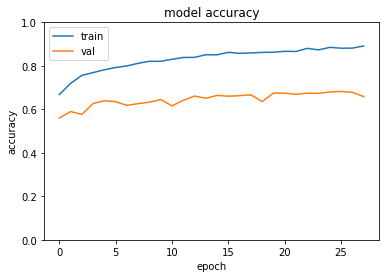

In [422]:
plt.plot(model_resnet_improved_no_crop_history.history['accuracy'])
plt.plot(model_resnet_improved_no_crop_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

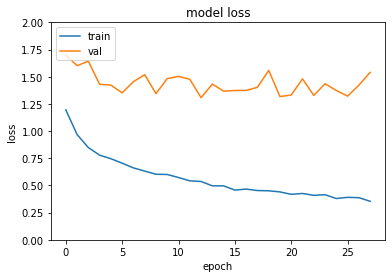

In [423]:
plt.plot(model_resnet_improved_no_crop_history.history['loss'])
plt.plot(model_resnet_improved_no_crop_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,2)
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

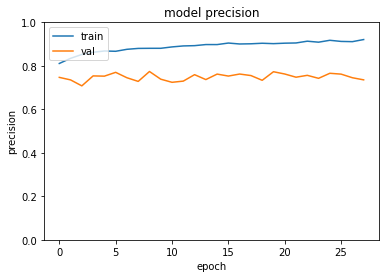

In [424]:
plt.plot(model_resnet_improved_no_crop_history.history['precision'])
plt.plot(model_resnet_improved_no_crop_history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'val'], loc='upper left')
plt.show()


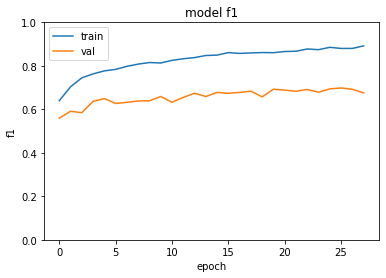

In [425]:
plt.plot(model_resnet_improved_no_crop_history.history['get_f1'])
plt.plot(model_resnet_improved_no_crop_history.history['val_get_f1'])
plt.title('model f1')
plt.ylabel('f1')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Con Crop: Buscar como hacer que este entre 0 y 1 en el eje Y. Entrenar todos los modelos (fine tuneados) sacandoles el early stopping, darle 10 o 20. Agregar el callback model checkpoint.

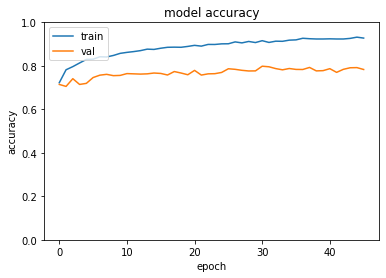

In [426]:
plt.plot(model_resnet_improved_history.history['accuracy'])
plt.plot(model_resnet_improved_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'val'], loc='upper left')
plt.show()


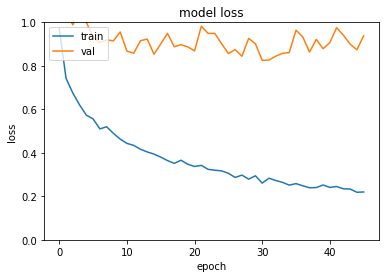

In [427]:
plt.plot(model_resnet_improved_history.history['loss'])
plt.plot(model_resnet_improved_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

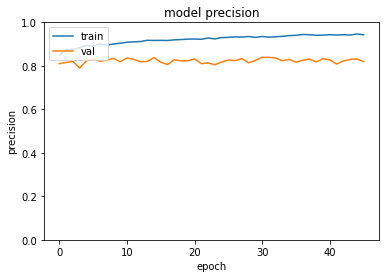

In [428]:
plt.plot(model_resnet_improved_history.history['precision'])
plt.plot(model_resnet_improved_history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'val'], loc='upper left')
plt.show()


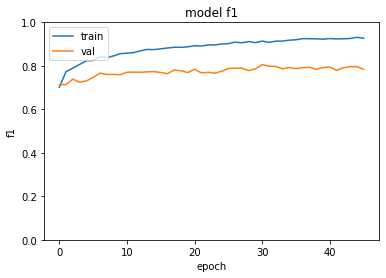

In [429]:
plt.plot(model_resnet_improved_history.history['get_f1'])
plt.plot(model_resnet_improved_history.history['val_get_f1'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Pre vs post- cropeo:

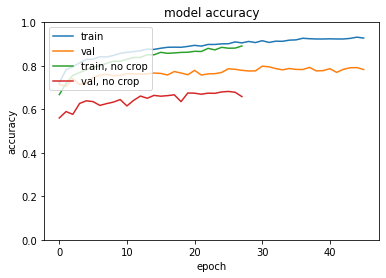

In [430]:
plt.plot(model_resnet_improved_history.history['accuracy'])
plt.plot(model_resnet_improved_history.history['val_accuracy'])
plt.plot(model_resnet_improved_no_crop_history.history['accuracy'])
plt.plot(model_resnet_improved_no_crop_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'train, no crop', 'val, no crop'], loc='upper left')
plt.show()

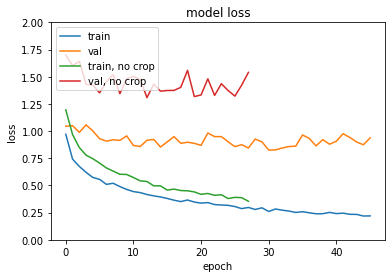

In [433]:
plt.plot(model_resnet_improved_history.history['loss'])
plt.plot(model_resnet_improved_history.history['val_loss'])
plt.plot(model_resnet_improved_no_crop_history.history['loss'])
plt.plot(model_resnet_improved_no_crop_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,2)
plt.xlabel('epoch')
plt.legend(['train', 'val', 'train, no crop', 'val, no crop'], loc='upper left')
plt.show()

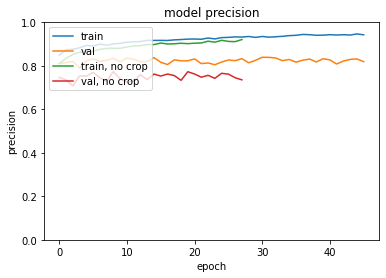

In [431]:
plt.plot(model_resnet_improved_history.history['precision'])
plt.plot(model_resnet_improved_history.history['val_precision'])
plt.plot(model_resnet_improved_no_crop_history.history['precision'])
plt.plot(model_resnet_improved_no_crop_history.history['val_precision'])
plt.title('model precision')
plt.ylim(0,1)
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'train, no crop', 'val, no crop'], loc='upper left')
plt.show()

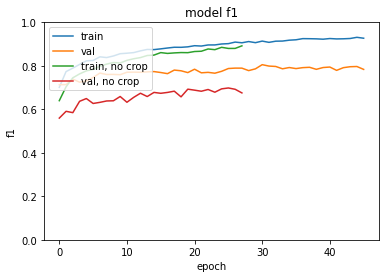

In [432]:
plt.plot(model_resnet_improved_history.history['get_f1'])
plt.plot(model_resnet_improved_history.history['val_get_f1'])
plt.plot(model_resnet_improved_no_crop_history.history['get_f1'])
plt.plot(model_resnet_improved_no_crop_history.history['val_get_f1'])
plt.title('model f1')
plt.ylabel('f1')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.legend(['train', 'val', 'train, no crop', 'val, no crop'], loc='upper left')
plt.show()

In [ ]:
# 1. Instantiate a base model with pre-trained weights.
base_model_3 = tf.keras.applications.mobilenet.MobileNet(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(img_height, img_width, 3),
    dropout=0.3,
    include_top=False)  # Do not include the ImageNet classifier at the top.

# 2. Then, freeze the base model.
base_model_3.trainable = False

# 3. Create a new model on top.
inputs_3 = keras.Input(shape=(img_height, img_width, 3))

# Apply Data augmentation on input images
x_3 = data_augmentation(inputs_3)

#_3 We must add the corresponding image pre-processing
x_3 = keras.applications.mobilenet.preprocess_input(x_3)

#_3 Add the pre-trained model here
x_3 = base_model_3(x_3, training=False)

#_3 Convert features of shape `base_model.output_shape[1:]` to vectors
x_3 = keras.layers.GlobalAveragePooling2D()(x_3)

#_3 Add dropout
x_3 = layers.Dropout(0.5)(x_3)

# A Dense classifier with a 5 output classes
outputs_3 = keras.layers.Dense(196, activation='softmax')(x_3)

# Final model
model_mobile_improved_no_crop = keras.Model(inputs_3, outputs_3)

model_mobile_improved_no_crop.summary()

In [ ]:
# 1. Instantiate a base model with pre-trained weights.
base_model_4 = tf.keras.applications.mobilenet.MobileNet(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(img_height, img_width, 3),
    dropout=0.3,
    include_top=False)  # Do not include the ImageNet classifier at the top.

# 2. Then, freeze the base model.
base_model_4.trainable = False

# 3. Create a new model on top.
inputs_4 = keras.Input(shape=(img_height, img_width, 3))

# Apply Data augmentation on input images
x_4 = data_augmentation(inputs_4)

# We must add the corresponding image pre-processing
x_4 = keras.applications.mobilenet.preprocess_input(x_4)

# Add the pre-trained model here
x_4 = base_model_4(x_4, training=False)

# Convert features of shape `base_model.output_shape[1:]` to vectors
x_4 = keras.layers.GlobalAveragePooling2D()(x_4)

# Add dropout
x_4 = layers.Dropout(0.5)(x_4)

# A Dense classifier with a 5 output classes
outputs_4 = keras.layers.Dense(196, activation='softmax')(x_4)

# Final model
model_mobile_improved = keras.Model(inputs_4, outputs_4)

model_mobile_improved.summary()

In [ ]:
model_mobile_improved.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy','Precision','Recall',get_f1]
)

model_mobile_improved_no_crop.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy','Precision','Recall',get_f1]
)

model_mobile_improved_history=model_mobile_improved.fit(
    image_train, 
    validation_data=image_test,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=1,
            verbose=1,
            mode='auto',
            restore_best_weights=True
        )
    ]
)

model_mobile_improved_no_crop_history=model_mobile_improved_no_crop.fit(
    image_train_pre_augment, 
    validation_data=image_test_pre_augment,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=1,
            verbose=1,
            mode='auto',
            restore_best_weights=True
        )
    ]
)

Fine Tuning de Mobilenet:

In [297]:
base_model_3.trainable= True
for i in range(len(base_model_3.layers)-8):
    base_model_3.layers[i].trainable = False
    
base_model_4.trainable= True
for i in range(len(base_model_4.layers)-8):
    base_model_4.layers[i].trainable = False

In [298]:
model_mobile_improved.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_50 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 tf.math.truediv_5 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_5 (TFOpLam  (None, 256, 256, 3)      0         
 bda)                                                            
                                                                 
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_24  (None, 1024)             0         
  (GlobalAveragePooling2D)                                

In [299]:
model_mobile_improved_no_crop.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_48 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 tf.math.truediv_4 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_4 (TFOpLam  (None, 256, 256, 3)      0         
 bda)                                                            
                                                                 
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_23  (None, 1024)             0         
  (GlobalAveragePooling2D)                                

In [300]:
model_mobile_improved.compile(
    optimizer=Adam(0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy','Precision','Recall',get_f1]
)

model_mobile_improved_no_crop.compile(
    optimizer=Adam(0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy','Precision','Recall',get_f1]
)

model_mobile_improved_history=model_mobile_improved.fit(
    image_train, 
    validation_data=image_test,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=20,
            verbose=1,
            mode='auto',
            restore_best_weights=True
        )
    ]
)

model_mobile_improved_no_crop_history=model_mobile_improved_no_crop.fit(
    image_train_pre_augment, 
    validation_data=image_test_pre_augment,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=20,
            verbose=1,
            mode='auto',
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
331/331 [==============================] - 36s 103ms/step - loss: 0.8122 - accuracy: 0.7825 - precision: 0.9045 - recall: 0.6492 - get_f1: 0.7530 - val_loss: 1.1011 - val_accuracy: 0.7202 - val_precision: 0.8905 - val_recall: 0.5650 - val_get_f1: 0.6895
Epoch 2/100
331/331 [==============================] - 30s 89ms/step - loss: 0.6988 - accuracy: 0.8151 - precision: 0.9206 - recall: 0.6968 - get_f1: 0.7912 - val_loss: 1.0236 - val_accuracy: 0.7409 - val_precision: 0.8916 - val_recall: 0.5842 - val_get_f1: 0.7027
Epoch 3/100
331/331 [==============================] - 29s 87ms/step - loss: 0.6303 - accuracy: 0.8322 - precision: 0.9238 - recall: 0.7190 - get_f1: 0.8071 - val_loss: 0.9894 - val_accuracy: 0.7496 - val_precision: 0.8888 - val_recall: 0.6065 - val_get_f1: 0.7181
Epoch 4/100
331/331 [==============================] - 30s 91ms/step - loss: 0.5755 - accuracy: 0.8462 - precision: 0.9323 - recall: 0.7513 - get_f1: 0.8301 - val_loss: 0.9531 - val_accuracy: 0.7587 - val

Epoch 32/100
331/331 [==============================] - 41s 123ms/step - loss: 0.1568 - accuracy: 0.9634 - precision: 0.9782 - recall: 0.9408 - get_f1: 0.9589 - val_loss: 0.6951 - val_accuracy: 0.8051 - val_precision: 0.8925 - val_recall: 0.7402 - val_get_f1: 0.8084
Epoch 33/100
331/331 [==============================] - 37s 111ms/step - loss: 0.1551 - accuracy: 0.9644 - precision: 0.9785 - recall: 0.9410 - get_f1: 0.9592 - val_loss: 0.7014 - val_accuracy: 0.8108 - val_precision: 0.8974 - val_recall: 0.7398 - val_get_f1: 0.8097
Epoch 34/100
331/331 [==============================] - 32s 97ms/step - loss: 0.1446 - accuracy: 0.9667 - precision: 0.9802 - recall: 0.9471 - get_f1: 0.9631 - val_loss: 0.6696 - val_accuracy: 0.8176 - val_precision: 0.8919 - val_recall: 0.7538 - val_get_f1: 0.8158
Epoch 35/100
331/331 [==============================] - 32s 97ms/step - loss: 0.1449 - accuracy: 0.9667 - precision: 0.9799 - recall: 0.9450 - get_f1: 0.9619 - val_loss: 0.6659 - val_accuracy: 0.8191 

Epoch 63/100
331/331 [==============================] - 40s 120ms/step - loss: 0.0703 - accuracy: 0.9859 - precision: 0.9903 - recall: 0.9782 - get_f1: 0.9841 - val_loss: 0.6045 - val_accuracy: 0.8308 - val_precision: 0.8966 - val_recall: 0.7889 - val_get_f1: 0.8380
Epoch 64/100
331/331 [==============================] - 45s 134ms/step - loss: 0.0681 - accuracy: 0.9867 - precision: 0.9900 - recall: 0.9802 - get_f1: 0.9850 - val_loss: 0.6004 - val_accuracy: 0.8316 - val_precision: 0.8992 - val_recall: 0.7847 - val_get_f1: 0.8368
Epoch 65/100
331/331 [==============================] - 49s 146ms/step - loss: 0.0656 - accuracy: 0.9868 - precision: 0.9909 - recall: 0.9818 - get_f1: 0.9862 - val_loss: 0.6242 - val_accuracy: 0.8301 - val_precision: 0.8932 - val_recall: 0.7802 - val_get_f1: 0.8320
Epoch 66/100
331/331 [==============================] - 46s 139ms/step - loss: 0.0659 - accuracy: 0.9883 - precision: 0.9906 - recall: 0.9818 - get_f1: 0.9861 - val_loss: 0.6225 - val_accuracy: 0.831

Epoch 94/100
331/331 [==============================] - 39s 117ms/step - loss: 0.0447 - accuracy: 0.9910 - precision: 0.9923 - recall: 0.9884 - get_f1: 0.9903 - val_loss: 0.5985 - val_accuracy: 0.8338 - val_precision: 0.8949 - val_recall: 0.8006 - val_get_f1: 0.8447
Epoch 95/100
331/331 [==============================] - 34s 102ms/step - loss: 0.0402 - accuracy: 0.9924 - precision: 0.9942 - recall: 0.9894 - get_f1: 0.9918 - val_loss: 0.5891 - val_accuracy: 0.8406 - val_precision: 0.8913 - val_recall: 0.8017 - val_get_f1: 0.8436
Epoch 96/100
331/331 [==============================] - 35s 106ms/step - loss: 0.0393 - accuracy: 0.9927 - precision: 0.9941 - recall: 0.9901 - get_f1: 0.9921 - val_loss: 0.5786 - val_accuracy: 0.8421 - val_precision: 0.8975 - val_recall: 0.8032 - val_get_f1: 0.8467
Epoch 97/100
331/331 [==============================] - 30s 89ms/step - loss: 0.0406 - accuracy: 0.9934 - precision: 0.9944 - recall: 0.9910 - get_f1: 0.9927 - val_loss: 0.5943 - val_accuracy: 0.8391

Epoch 25/100
331/331 [==============================] - 25s 74ms/step - loss: 0.2873 - accuracy: 0.9296 - precision: 0.9661 - recall: 0.8773 - get_f1: 0.9189 - val_loss: 1.1373 - val_accuracy: 0.7068 - val_precision: 0.8549 - val_recall: 0.5788 - val_get_f1: 0.6881
Epoch 26/100
331/331 [==============================] - 25s 75ms/step - loss: 0.2777 - accuracy: 0.9341 - precision: 0.9662 - recall: 0.8842 - get_f1: 0.9227 - val_loss: 1.1263 - val_accuracy: 0.6989 - val_precision: 0.8486 - val_recall: 0.5822 - val_get_f1: 0.6883
Epoch 27/100
331/331 [==============================] - 25s 74ms/step - loss: 0.2604 - accuracy: 0.9381 - precision: 0.9665 - recall: 0.8909 - get_f1: 0.9265 - val_loss: 1.1120 - val_accuracy: 0.7133 - val_precision: 0.8484 - val_recall: 0.5939 - val_get_f1: 0.6964
Epoch 28/100
331/331 [==============================] - 25s 74ms/step - loss: 0.2612 - accuracy: 0.9384 - precision: 0.9680 - recall: 0.8895 - get_f1: 0.9266 - val_loss: 1.1083 - val_accuracy: 0.7065 - 

Epoch 56/100
331/331 [==============================] - 49s 148ms/step - loss: 0.1200 - accuracy: 0.9738 - precision: 0.9841 - recall: 0.9588 - get_f1: 0.9711 - val_loss: 1.0168 - val_accuracy: 0.7329 - val_precision: 0.8490 - val_recall: 0.6502 - val_get_f1: 0.7346
Epoch 57/100
331/331 [==============================] - 32s 97ms/step - loss: 0.1197 - accuracy: 0.9760 - precision: 0.9848 - recall: 0.9591 - get_f1: 0.9716 - val_loss: 1.0234 - val_accuracy: 0.7261 - val_precision: 0.8497 - val_recall: 0.6490 - val_get_f1: 0.7340
Epoch 58/100
331/331 [==============================] - 34s 102ms/step - loss: 0.1100 - accuracy: 0.9784 - precision: 0.9860 - recall: 0.9628 - get_f1: 0.9741 - val_loss: 1.0365 - val_accuracy: 0.7223 - val_precision: 0.8431 - val_recall: 0.6415 - val_get_f1: 0.7270
Epoch 59/100
331/331 [==============================] - 39s 118ms/step - loss: 0.1224 - accuracy: 0.9733 - precision: 0.9824 - recall: 0.9577 - get_f1: 0.9697 - val_loss: 1.0199 - val_accuracy: 0.7314

Epoch 87/100
331/331 [==============================] - 66s 198ms/step - loss: 0.0686 - accuracy: 0.9874 - precision: 0.9916 - recall: 0.9804 - get_f1: 0.9859 - val_loss: 0.9814 - val_accuracy: 0.7446 - val_precision: 0.8510 - val_recall: 0.6732 - val_get_f1: 0.7502
Epoch 88/100
331/331 [==============================] - 29s 86ms/step - loss: 0.0706 - accuracy: 0.9856 - precision: 0.9890 - recall: 0.9762 - get_f1: 0.9824 - val_loss: 0.9894 - val_accuracy: 0.7450 - val_precision: 0.8472 - val_recall: 0.6808 - val_get_f1: 0.7538
Epoch 89/100
331/331 [==============================] - 29s 85ms/step - loss: 0.0739 - accuracy: 0.9842 - precision: 0.9881 - recall: 0.9762 - get_f1: 0.9820 - val_loss: 0.9831 - val_accuracy: 0.7476 - val_precision: 0.8516 - val_recall: 0.6740 - val_get_f1: 0.7507
Epoch 90/100
331/331 [==============================] - 28s 83ms/step - loss: 0.0629 - accuracy: 0.9885 - precision: 0.9910 - recall: 0.9831 - get_f1: 0.9870 - val_loss: 0.9907 - val_accuracy: 0.7423 -

Performance de MobileNet

Sin Crop:

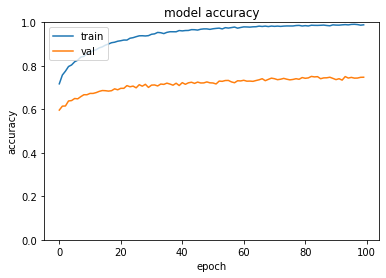

In [343]:
plt.plot(model_mobile_improved_no_crop_history.history['accuracy'])
plt.plot(model_mobile_improved_no_crop_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


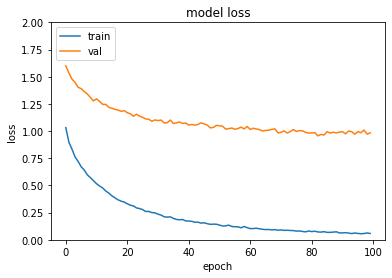

In [342]:
plt.plot(model_mobile_improved_no_crop_history.history['loss'])
plt.plot(model_mobile_improved_no_crop_history.history['val_loss'])
plt.title('model loss')
plt.ylim(0,2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

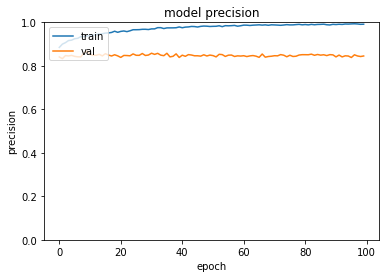

In [344]:
plt.plot(model_mobile_improved_no_crop_history.history['precision'])
plt.plot(model_mobile_improved_no_crop_history.history['val_precision'])
plt.title('model precision')
plt.ylim(0,1)
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


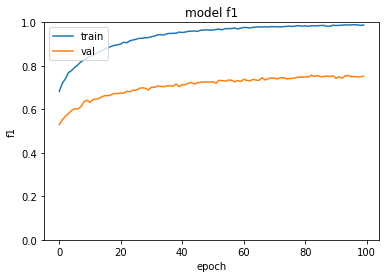

In [345]:
plt.plot(model_mobile_improved_no_crop_history.history['get_f1'])
plt.plot(model_mobile_improved_no_crop_history.history['val_get_f1'])
plt.title('model f1')
plt.ylim(0,1)
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Con Crop:

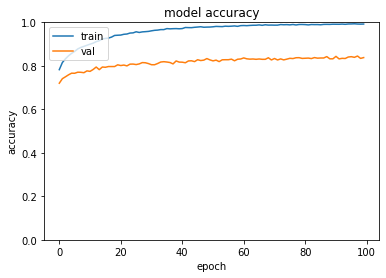

In [346]:
plt.plot(model_mobile_improved_history.history['accuracy'])
plt.plot(model_mobile_improved_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


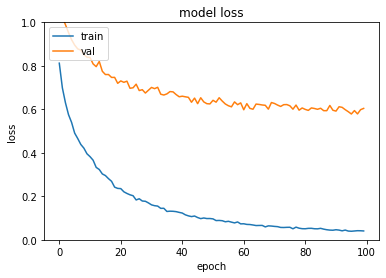

In [347]:
plt.plot(model_mobile_improved_history.history['loss'])
plt.plot(model_mobile_improved_history.history['val_loss'])
plt.title('model loss')
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

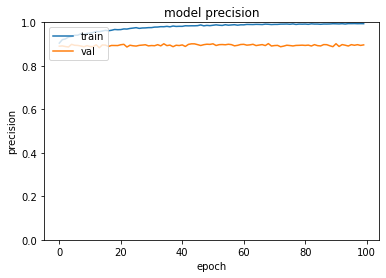

In [348]:
plt.plot(model_mobile_improved_history.history['precision'])
plt.plot(model_mobile_improved_history.history['val_precision'])
plt.title('model precision')
plt.ylim(0,1)
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


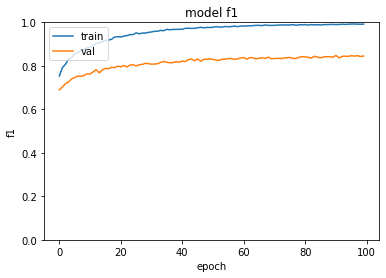

In [349]:
plt.plot(model_mobile_improved_history.history['get_f1'])
plt.plot(model_mobile_improved_history.history['val_get_f1'])
plt.title('model f1')
plt.ylim(0,1)
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Crop vs No Crop de MobileNet

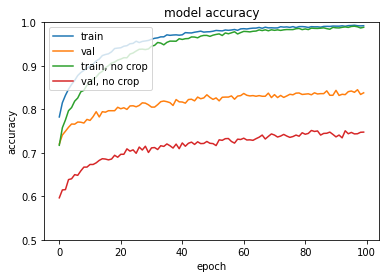

In [351]:
plt.plot(model_mobile_improved_history.history['accuracy'])
plt.plot(model_mobile_improved_history.history['val_accuracy'])
plt.plot(model_mobile_improved_no_crop_history.history['accuracy'])
plt.plot(model_mobile_improved_no_crop_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylim(0.5,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'train, no crop', 'val, no crop'], loc='upper left')
plt.show()

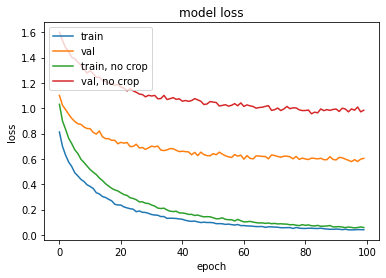

In [322]:
plt.plot(model_mobile_improved_history.history['loss'])
plt.plot(model_mobile_improved_history.history['val_loss'])
plt.plot(model_mobile_improved_no_crop_history.history['loss'])
plt.plot(model_mobile_improved_no_crop_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'train, no crop', 'val, no crop'], loc='upper left')
plt.show()

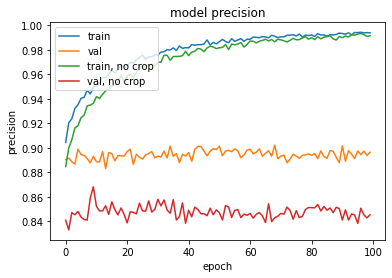

In [353]:
plt.plot(model_mobile_improved_history.history['precision'])
plt.plot(model_mobile_improved_history.history['val_precision'])
plt.plot(model_mobile_improved_no_crop_history.history['precision'])
plt.plot(model_mobile_improved_no_crop_history.history['val_precision'])
plt.title('model precision')

plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'train, no crop', 'val, no crop'], loc='upper left')
plt.show()

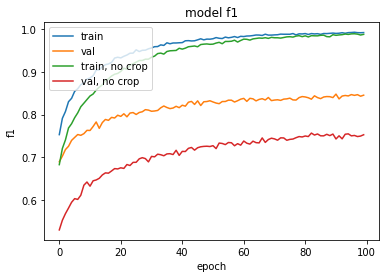

In [324]:
plt.plot(model_mobile_improved_history.history['get_f1'])
plt.plot(model_mobile_improved_history.history['val_get_f1'])
plt.plot(model_mobile_improved_no_crop_history.history['get_f1'])
plt.plot(model_mobile_improved_no_crop_history.history['val_get_f1'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'train, no crop', 'val, no crop'], loc='upper left')
plt.show()

Resnet (Con Crop) vs MobileNet (Con Crop):

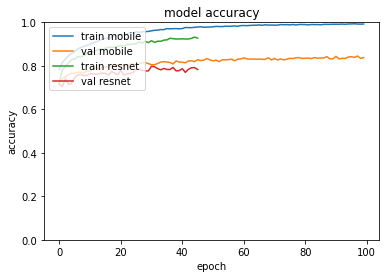

In [354]:
plt.plot(model_mobile_improved_history.history['accuracy'])
plt.plot(model_mobile_improved_history.history['val_accuracy'])
plt.plot(model_resnet_improved_history.history['accuracy'])
plt.plot(model_resnet_improved_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train mobile', 'val mobile', 'train resnet', 'val resnet'], loc='upper left')
plt.show()

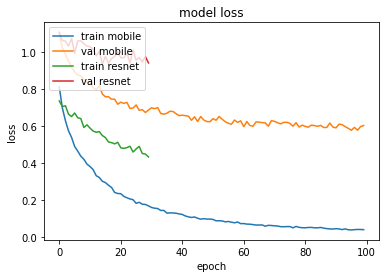

In [326]:
plt.plot(model_mobile_improved_history.history['loss'])
plt.plot(model_mobile_improved_history.history['val_loss'])
plt.plot(model_resnet_improved_history.history['loss'])
plt.plot(model_resnet_improved_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train mobile', 'val mobile', 'train resnet', 'val resnet'], loc='upper left')
plt.show()

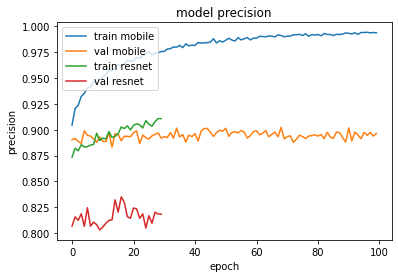

In [327]:
plt.plot(model_mobile_improved_history.history['precision'])
plt.plot(model_mobile_improved_history.history['val_precision'])
plt.plot(model_resnet_improved_history.history['precision'])
plt.plot(model_resnet_improved_history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train mobile', 'val mobile', 'train resnet', 'val resnet'], loc='upper left')
plt.show()

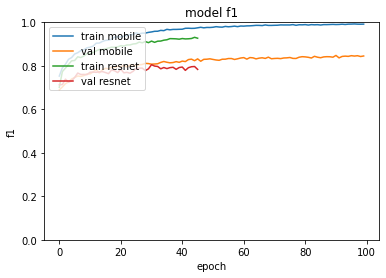

In [355]:
plt.plot(model_mobile_improved_history.history['get_f1'])
plt.plot(model_mobile_improved_history.history['val_get_f1'])
plt.plot(model_resnet_improved_history.history['get_f1'])
plt.plot(model_resnet_improved_history.history['val_get_f1'])
plt.title('model f1')
plt.ylim(0,1)
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train mobile', 'val mobile', 'train resnet', 'val resnet'], loc='upper left')
plt.show()

In [356]:
model_mobile_improved.save('modelos/mobile.h5')
model_resnet_improved.save('modelos/resnet.h5')
model_mobile_improved_no_crop.save('modelos/mobile_nocrop.h5')
model_resnet_improved_no_crop.save('modelos/resnet_nocrop.h5')

Volver a correr cosas aqui en drive para importar los modelos:

In [201]:
# import os
# from keras.applications.imagenet_utils import preprocess_input

# custom_objects = {"get_f1": get_f1}
# with keras.utils.custom_object_scope(custom_objects):
#     model_mobile_improved=tf.keras.models.load_model(dir+'/modelos/mobile.h5',custom_objects=custom_objects)
#     model_resnet_improved=tf.keras.models.load_model(dir+'/modelos/resnet.h5',custom_objects=custom_objects)
#     model_mobile_improved_no_crop=tf.keras.models.load_model(dir+'/modelos/mobile_nocrop.h5',custom_objects=custom_objects)
#     model_resnet_improved_no_crop=tf.keras.models.load_model(dir+'/modelos/resnet_nocrop.h5',custom_objects=custom_objects)

In [202]:
labels_names

0                    1                    2    \
0  AM General Hummer SUV 2000  Acura RL Sedan 2012  Acura TL Sedan 2012   

                    3                     4                          5    \
0  Acura TL Type-S 2008  Acura TSX Sedan 2012  Acura Integra Type R 2001   

                        6                                         7    \
0  Acura ZDX Hatchback 2012  Aston Martin V8 Vantage Convertible 2012   

                                  8                                     9    \
0  Aston Martin V8 Vantage Coupe 2012  Aston Martin Virage Convertible 2012   

   ...                      186                        187  \
0  ...  Toyota Camry Sedan 2012  Toyota Corolla Sedan 2012   

                       188                             189  \
0  Toyota 4Runner SUV 2012  Volkswagen Golf Hatchback 2012   

                              190                               191  \
0  Volkswagen Golf Hatchback 1991  Volkswagen Beetle Hatchback 2012   

                        192                   193                  194  \
0  Volvo C30 Hatchback 2012  Volvo 240 Sedan 1993  Volvo XC90 SUV 2007   

                             195  
0  smart fortwo Convertible 2012  

[1 rows x 196 columns]

In [203]:
labels_names.columns[labels_names.isin(['Aston Martin V8 Vantage Convertible 2012']).any()][0]

7

In [357]:
dir2=dir+"car_ims/test/"
times=[]
predicted_models={}
for subdir, dirs, files in os.walk(dir2):
    for direct in dirs:
        features=[]
        for file in os.listdir(dir2+direct):
            currentime=time.time()
            img = cv2.imread(dir2+direct+'/'+file)
            postime=time.time()
            x=cv2.resize(img, (256,256))
#             x=x.astype("uint8")
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            features.append(np.argmax(model_resnet_improved.predict(x)))
            times.append(currentime-postime)
        predicted_models[direct]=features

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


In [238]:
times_pd=pd.DataFrame(times)

In [241]:
times_pd=times_pd.applymap(lambda x: -x)

In [243]:
times_pd.mean()

0    0.003921
dtype: float64

In [244]:
!nvidia-smi

Thu Jun 16 02:17:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.59       Driver Version: 512.59       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  8%   47C    P8    10W / 180W |   7797MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Alrededor de 39 milisegundos por imagen en una computadora con una Nvidia GeForce 1080

In [205]:
# predicted_models

In [392]:
labels_names_sorted=labels_names_sorted.sort_values(by=0)

In [393]:
true_models={}
for subdir, dirs, files in os.walk(dir2):
    for direct in dirs:
        features=[]
        for file in os.listdir(dir2+direct):
            features.append(np.where(np.all(labels_names_sorted==direct.replace('_','/'),axis=1))[0].item())
        true_models[direct]=features

In [394]:
true_models

{'Acura Integra Type R 2001': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'Acura RL Sedan 2012': [2, 2, 2, 2, 2, 2],
 'Acura TL Sedan 2012': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 'Acura TL Type-S 2008': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
 'Acura TSX Sedan 2012': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
 'Acura ZDX Hatchback 2012': [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
 'AM General Hummer SUV 2000': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Aston Martin V8 Vantage Convertible 2012': [7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7],
 'Aston Martin V8 Vantage Coupe 2012': [8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8],
 'Aston Martin Virage Convertible 2012': [9, 9, 9, 9, 9, 9, 9],
 'Aston Martin Virage Coupe 2012': [10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10],
 'Audi 100 Sedan 1994': [11,
  11,
  11

In [209]:
from sklearn.metrics import classification_report

In [210]:
category='Bugatti Veyron 16.4 Convertible 2009'
print(classification_report(true_models[category],predicted_models[category],zero_division=1,output_dict=True)['accuracy'])

1.0


In [359]:
predicted_models_mobile={}
times_mobile=[]
for subdir, dirs, files in os.walk(dir2):
    for direct in dirs:
        features=[]
        for file in os.listdir(dir2+direct):
            currtime=time.time()
            img = cv2.imread(dir2+direct+'/'+file)
            postime=time.time()
            x=cv2.resize(img, (256,256))
#             x=x.astype("uint8")
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            features.append(np.argmax(model_mobile_improved.predict(x)))
            times_mobile.append(postime-currtime)
        predicted_models_mobile[direct]=features

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


In [246]:
times_mobile_pd=pd.DataFrame(times_mobile)
times_mobile_pd.mean()

0    0.003993
dtype: float64

Alrededor de 39 milisegundos por imagen en una computadora con una Nvidia GeForce 1080

In [395]:
accuracy_report={}
accuracy_report_mobile={}

In [396]:
for categ in true_models.keys():
    accuracy_report[categ]=classification_report(true_models[categ],predicted_models[categ],zero_division=1,output_dict=True)['accuracy']
    accuracy_report_mobile[categ]=classification_report(true_models[categ],predicted_models_mobile[categ],zero_division=1,output_dict=True)['accuracy']

G:\ProgramData\Anaconda3\envs\sint\lib\site-packages\numpy\lib\function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\ProgramData\Anaconda3\envs\sint\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
G:\ProgramData\Anaconda3\envs\sint\lib\site-packages\numpy\lib\function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\ProgramData\Anaconda3\envs\sint\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [397]:
prediction_performance=pd.DataFrame.from_dict(accuracy_report,orient='index',columns=['accuracy'])
prediction_performance_mobile=pd.DataFrame.from_dict(accuracy_report_mobile,orient='index',columns=['accuracy'])

In [407]:
print(true_models['Acura Integra Type R 2001'])
print(predicted_models['Acura Integra Type R 2001'])
print(predicted_models_mobile['Acura Integra Type R 2001'])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 171, 1, 1]
[1, 1, 1, 56, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 57, 119]


In [399]:
prediction_performance

accuracy
Acura Integra Type R 2001       0.937500
Acura RL Sedan 2012             0.500000
Acura TL Sedan 2012             0.294118
Acura TL Type-S 2008            0.312500
Acura TSX Sedan 2012            0.071429
...                                  ...
Volkswagen Golf Hatchback 1991  0.600000
Volkswagen Golf Hatchback 2012  0.235294
Volvo 240 Sedan 1993            0.684211
Volvo C30 Hatchback 2012        0.666667
Volvo XC90 SUV 2007             0.705882

[196 rows x 1 columns]

Top y Bottom 5 de Resnet50

In [400]:
prediction_performance.sort_values(by = 'accuracy',ascending=False).head(5)

accuracy
Bugatti Veyron 16.4 Convertible 2009       1.0
Audi TT RS Coupe 2012                      1.0
Hyundai Veloster Hatchback 2012            1.0
Lamborghini Diablo Coupe 2001              1.0
Lamborghini Reventon Coupe 2008            1.0

In [401]:
prediction_performance.sort_values(by = 'accuracy',ascending=False).tail(5)

accuracy
Audi TTS Coupe 2012            0.125000
Chevrolet Impala Sedan 2007    0.117647
BMW 1 Series Convertible 2012  0.111111
Acura TSX Sedan 2012           0.071429
Audi S4 Sedan 2012             0.000000

Top y Bottom 5 de MobileNet

In [402]:
prediction_performance_mobile.sort_values(by = 'accuracy',ascending=False).head(5)

accuracy
Nissan Leaf Hatchback 2012                  1.0
Lincoln Town Car Sedan 2011                 1.0
Jaguar XK XKR 2012                          1.0
MINI Cooper Roadster Convertible 2012       1.0
Chevrolet Cobalt SS 2010                    1.0

In [405]:
prediction_performance_mobile.sort_values(by = 'accuracy',ascending=False).tail(5)

accuracy
Dodge Magnum Wagon 2008           0.428571
Audi S4 Sedan 2012                0.384615
Audi TTS Coupe 2012               0.312500
Audi TT RS Coupe 2012             0.307692
Chevrolet Express Cargo Van 2007  0.000000

In [417]:
dir2=dir+"car_ims/test/"
dir3=dir+"car_ims_pre_augmentation/car_ims/test/"

images_plot=[
    [dir2+"Ford Freestar Minivan 2007/008834.jpg","Ford Freestar Minivan 2007",dir3+"Ford Freestar Minivan 2007/008834.jpg"],
    [dir2+"Honda Accord Sedan 2012/010669.jpg","Honda Accord Sedan 2012",dir3+"Honda Accord Sedan 2012/010669.jpg"],
    [dir2+"Mitsubishi Lancer Sedan 2012/013746.jpg","Mitsubishi Lancer Sedan 2012",dir3+"Mitsubishi Lancer Sedan 2012/013746.jpg"],
    [dir2+"Toyota Corolla Sedan 2012/015496.jpg","Toyota Corolla Sedan 2012",dir3+"Toyota Corolla Sedan 2012/015496.jpg"],
    [dir2+"Jeep Compass SUV 2012/012281.jpg","Jeep Compass SUV 2012",dir3+"Jeep Compass SUV 2012/012281.jpg"],
    [dir2+"Lamborghini Aventador Coupe 2012/012430.jpg","Lamborghini Aventador Coupe 2012",dir3+"Lamborghini Aventador Coupe 2012/012430.jpg"],
    [dir2+"Audi TT RS Coupe 2012/002051.jpg","Audi TT RS Coupe 2012",dir3+"Audi TT RS Coupe 2012/002051.jpg"],
    [dir2+"BMW 1 Series Convertible 2012/002187.jpg","BMW 1 Series Convertible 2012",dir3+"BMW 1 Series Convertible 2012/002187.jpg"],
    [dir2+"Hyundai Veracruz SUV 2012/011002.jpg","Hyundai Veracruz SUV 2012",dir3+"Hyundai Veracruz SUV 2012/011002.jpg"]
]

1/1 [==============================] - 0s 25ms/step


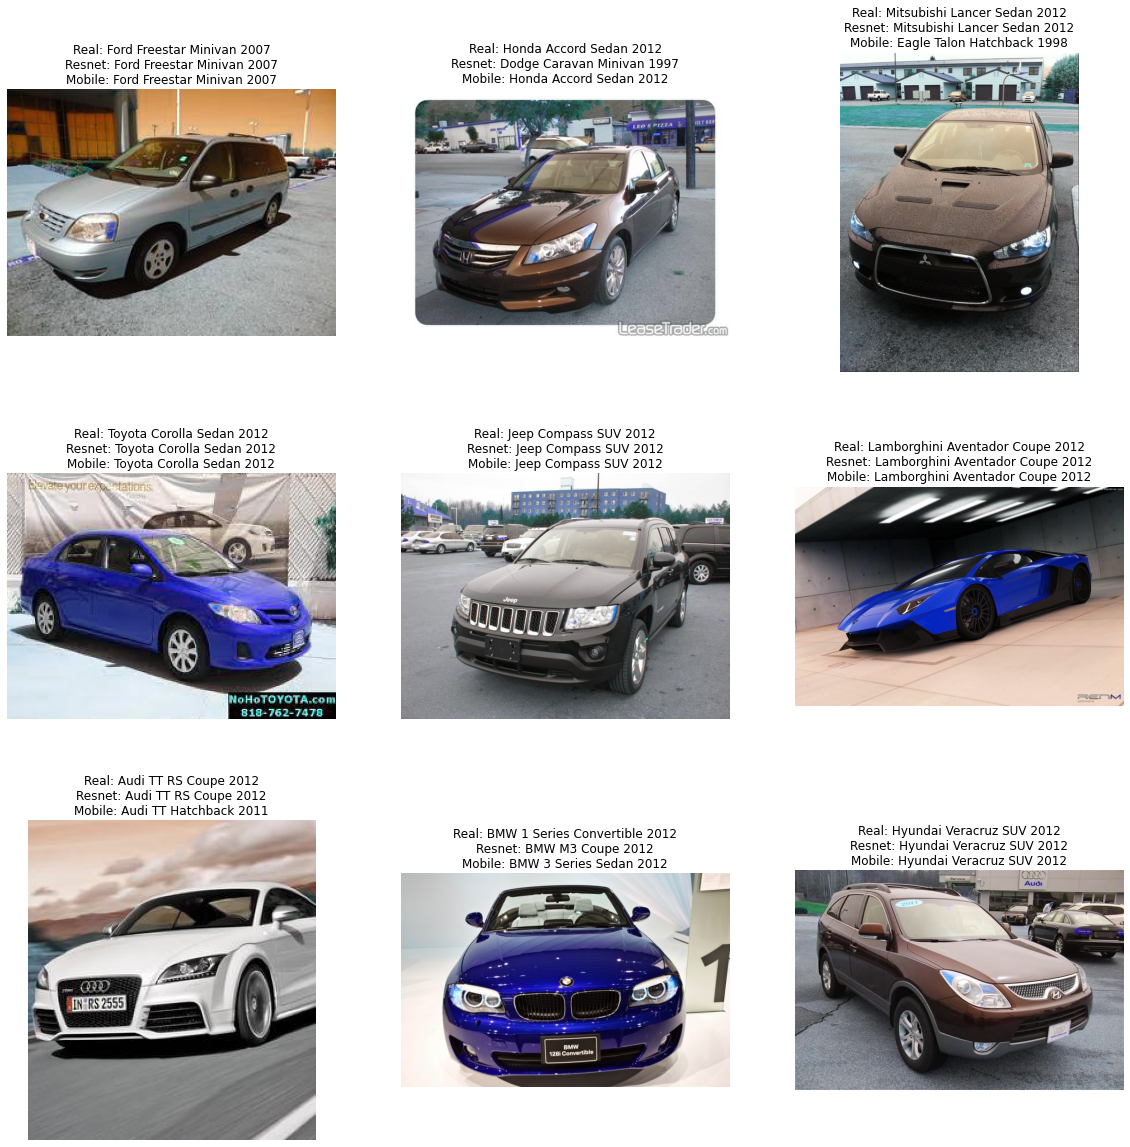

In [418]:
plt.figure(figsize=(20, 20))
counter=0
for image in images_plot:
        ax = plt.subplot(3, 3, counter + 1)
        image_cropped=cv2.imread(image[0])
        image_full=cv2.imread(image[2])
        plt.imshow(image_full.astype("uint8"))
        x=cv2.resize(image_cropped.astype("uint8"), (256,256))
#             x=x.astype("uint8")
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        plt.title("Real: "+image[1]+'\n'+
                  "Resnet: "+labels_names_sorted.iloc[np.argmax(model_resnet_improved.predict(x)),0]+'\n'+
                 "Mobile: "+labels_names_sorted.iloc[np.argmax(model_mobile_improved.predict(x)),0])
        plt.axis("off")
        counter=counter+1

Lo que ve el modelo (Croppeado):

1/1 [==============================] - 0s 19ms/step


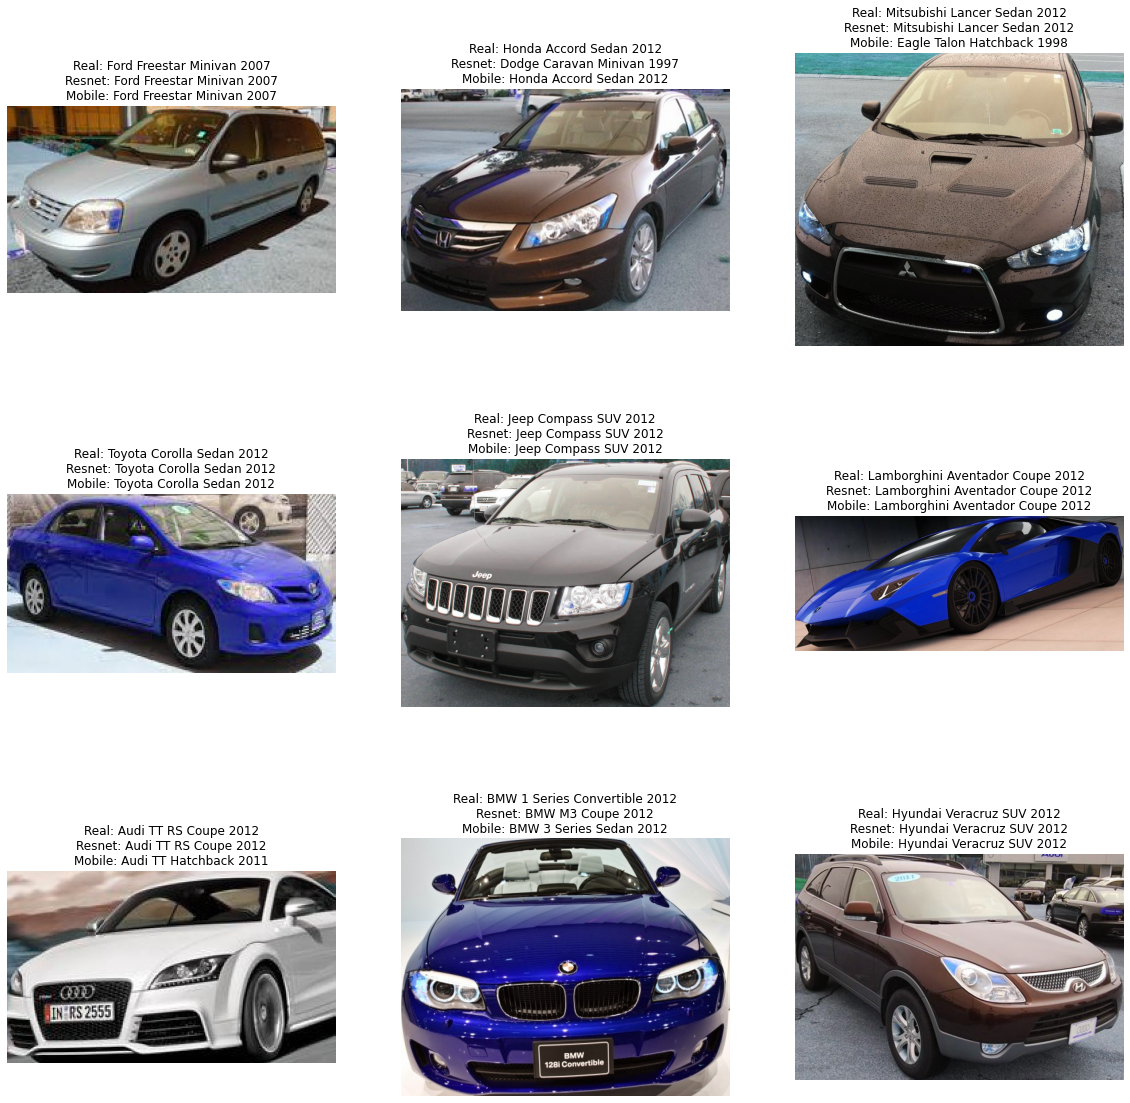

In [419]:
plt.figure(figsize=(20, 20))
counter=0
for image in images_plot:
        ax = plt.subplot(3, 3, counter + 1)
        image_cropped=cv2.imread(image[0])
        image_full=cv2.imread(image[2])
        plt.imshow(image_cropped.astype("uint8"))
        x=cv2.resize(image_cropped.astype("uint8"), (256,256))
#             x=x.astype("uint8")
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        plt.title("Real: "+image[1]+'\n'+
                  "Resnet: "+labels_names_sorted.iloc[np.argmax(model_resnet_improved.predict(x)),0]+'\n'+
                 "Mobile: "+labels_names_sorted.iloc[np.argmax(model_mobile_improved.predict(x)),0])
        plt.axis("off")
        counter=counter+1

In [421]:
model_mobile_improved.save_weights('modelos/mobile_weights.h5')
model_resnet_improved.save_weights('modelos/resnet_weights.h5')
model_mobile_improved_no_crop.save_weights('modelos/mobile_nocrop_weights.h5')
model_resnet_improved_no_crop.save_weights('modelos/resnet_nocrop_weights.h5')